# World Bank Education Data Analysis


## Introduction to Python


In [7]:
print("World Bank")
print(5)
print(5.5)
print(True)

World Bank
5
5.5
True


## Loading the Data

Data taken from [World Bank Data Repository](https://data.worldbank.org/topic/education?cid=EXT_TWBN_D_EXT)

In [12]:
import pandas as pd

In [17]:
main_data=pd.read_csv("/content/API_4_DS2_en_csv_v2_2056686.csv" , skiprows=4)
main_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,53.669919,54.056784,54.383281,54.710292,55.119933,55.631102,56.075544,56.703126,57.414449,58.086708,58.679715,59.55249,60.248997,60.890062,61.639241,62.566563,63.078929,63.850512,64.825383,65.810270,66.635051,67.185101,67.578450,67.804376,67.945127,68.154412,67.755890,67.567480,67.614074,67.749705,67.796747,68.523104,69.021763,69.298246,69.471969,69.667845,69.450721,69.326281,69.279421,69.261277,69.240421,69.323344,69.421636,69.554820,69.734750,69.935320,69.857389,69.690384,69.445924,69.159726,68.838092,68.885601,68.986934,69.108851,69.181105,69.159774,69.137615,68.946339,68.646606,68.321199,NaN,NaN
1,Aruba,ABW,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,43.847190,43.358346,42.925745,42.488756,41.950133,41.290098,40.689595,39.900095,39.011064,38.134727,37.316086,36.08681,35.015040,33.989011,32.869085,31.577559,30.878421,29.907564,28.734007,27.542514,26.514244,25.829247,25.314207,25.001206,24.785155,24.527973,24.862716,24.976954,24.853059,24.641172,24.547459,24.084677,23.804499,23.685590,23.598435,23.420148,23.562500,23.583106,23.490725,23.348127,23.179202,22.918685,22.622958,22.277539,21.882374,21.473343,21.223992,21.080398,21.005742,20.949189,20.873619,20.530937,20.092629,19.593055,19.111724,18.703098,18.257495,17.980183,17.802447,17.620445,NaN,NaN
2,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,"Unemployment, male (% of male labor force) (mo...",SL.UEM.TOTL.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
country_data=pd.read_csv("/content/Metadata_Country_API_4_DS2_en_csv_v2_2056686.csv")
country_data.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFG,South Asia,Low income,NaN,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,NaN,Andorra,NaN


## Cleaning the Data

### Creating Our Dataset

In [19]:
main_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [21]:
main_data['Indicator Name'].unique()

array(['Population ages 15-64 (% of total population)',
       'Population ages 0-14 (% of total population)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Unemployment, male (% of male labor force) (modeled ILO estimate)',
       'Unemployment, female (% of female labor force) (modeled ILO estimate)',
       'Labor force, total',
       'Labor force, female (% of total labor force)',
       'Probability of dying among youth ages 20-24 years (per 1,000)',
       'Probability of dying among adolescents ages 15-19 years (per 1,000)',
       'Probability of dying among adolescents ages 10-14 years (per 1,000)',
       'Probability of dying among children ages 5-9 years (per 1,000)',
       'Number of deaths ages 20-24 years',
       'Number of deaths ages 15-19 years',
       'Number of deaths ages 10-14 years',
       'Number of deaths ages 5-9 years',
       'Government expenditure on education, total (% of GDP)',
       'Government expenditure o

In [24]:
main_data_unem=main_data[main_data['Indicator Name']=='Unemployment, female (% of female labor force) (modeled ILO estimate)']
main_data_unem.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
4,Aruba,ABW,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,Afghanistan,AFG,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.36,14.610000,14.610000,14.760000,14.950000,14.58,14.76,14.770000,14.840000,14.79,14.750000,15.02,14.87,14.940000,14.96,14.540000,14.85,14.27,14.99,14.76,14.79,14.86,14.70,14.53,14.450000,14.33,14.09,13.92,13.81,NaN,NaN
328,Angola,AGO,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.59,2.830000,2.900000,2.910000,2.940000,3.02,2.91,2.970000,2.920000,2.80,2.810000,2.94,2.84,2.910000,2.92,2.810000,2.80,2.77,2.85,10.92,7.72,7.81,7.78,7.71,7.650000,7.50,7.41,7.28,7.22,NaN,NaN
490,Albania,ALB,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.60,16.040001,16.639999,16.780001,16.790001,16.76,16.41,16.780001,16.950001,16.92,16.959999,16.99,17.01,16.940001,16.85,16.620001,16.40,13.75,15.73,15.88,13.75,11.46,13.34,15.45,17.120001,14.45,12.48,11.87,11.31,NaN,NaN
652,Andorra,AND,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
main_data_unem=main_data_unem[['Country Name', 'Country Code',  '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019']]
main_data_unem.head()     

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,Afghanistan,AFG,14.36,14.610000,14.610000,14.760000,14.950000,14.58,14.76,14.770000,14.840000,14.79,14.750000,15.02,14.87,14.940000,14.96,14.540000,14.85,14.27,14.99,14.76,14.79,14.86,14.70,14.53,14.450000,14.33,14.09,13.92,13.81
328,Angola,AGO,2.59,2.830000,2.900000,2.910000,2.940000,3.02,2.91,2.970000,2.920000,2.80,2.810000,2.94,2.84,2.910000,2.92,2.810000,2.80,2.77,2.85,10.92,7.72,7.81,7.78,7.71,7.650000,7.50,7.41,7.28,7.22
490,Albania,ALB,15.60,16.040001,16.639999,16.780001,16.790001,16.76,16.41,16.780001,16.950001,16.92,16.959999,16.99,17.01,16.940001,16.85,16.620001,16.40,13.75,15.73,15.88,13.75,11.46,13.34,15.45,17.120001,14.45,12.48,11.87,11.31
652,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
country_data.columns

Index(['Country Code', 'Region', 'IncomeGroup'], dtype='object')

In [56]:
country_data=country_data[['Country Code', 'Region', 'IncomeGroup']]
country_data.head()

,Country Code,Region,IncomeGroup
0,ABW,Latin America & Caribbean,High income
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Lower middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income


In [57]:
merged_data=pd.merge(main_data_unem,country_data,on='Country Code')
merged_data.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Region,IncomeGroup
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income
1,Afghanistan,AFG,14.36,14.610000,14.610000,14.760000,14.950000,14.58,14.76,14.770000,14.840000,14.79,14.750000,15.02,14.87,14.940000,14.96,14.540000,14.85,14.27,14.99,14.76,14.79,14.86,14.70,14.53,14.450000,14.33,14.09,13.92,13.81,South Asia,Low income
2,Angola,AGO,2.59,2.830000,2.900000,2.910000,2.940000,3.02,2.91,2.970000,2.920000,2.80,2.810000,2.94,2.84,2.910000,2.92,2.810000,2.80,2.77,2.85,10.92,7.72,7.81,7.78,7.71,7.650000,7.50,7.41,7.28,7.22,Sub-Saharan Africa,Lower middle income
3,Albania,ALB,15.60,16.040001,16.639999,16.780001,16.790001,16.76,16.41,16.780001,16.950001,16.92,16.959999,16.99,17.01,16.940001,16.85,16.620001,16.40,13.75,15.73,15.88,13.75,11.46,13.34,15.45,17.120001,14.45,12.48,11.87,11.31,Europe & Central Asia,Upper middle income
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,High income


## Exploratory Data Analysis

In [58]:
merged_data.isna().sum()

Country Name     0
Country Code     0
1991            30
1992            30
1993            30
1994            30
1995            30
1996            30
1997            30
1998            30
1999            30
2000            30
2001            30
2002            30
2003            30
2004            30
2005            30
2006            30
2007            30
2008            30
2009            30
2010            30
2011            30
2012            30
2013            30
2014            30
2015            30
2016            30
2017            30
2018            30
2019            30
Region          46
IncomeGroup     46
dtype: int64

In [59]:
merged_data_clean = merged_data.dropna()
merged_data_clean.shape

(187, 33)

In [62]:
grouped_data_income = merged_data_clean.groupby(['IncomeGroup']).mean()
grouped_data_income

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
IncomeGroup,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
High income,7.734000,8.053833,8.915500,9.133833,8.962000,8.985833,8.641833,8.512167,8.507667,8.341667,8.105500,8.261500,8.499500,8.421667,8.279833,7.733833,7.143333,6.958833,8.159667,8.590333,8.725167,8.949833,9.030333,8.679833,8.272167,7.856333,7.309167,6.753667,6.476667
Low income,5.439655,5.375862,5.497586,5.785862,5.986552,6.110345,6.188621,6.415862,6.499655,6.732759,7.037241,7.125172,7.208621,7.264483,7.308276,7.301379,7.390000,7.291034,7.628276,7.804828,7.746897,7.850690,7.832069,7.747931,7.685172,7.625172,7.499655,7.372759,7.313793
Lower middle income,7.802292,7.872292,8.168333,8.325833,8.500833,8.612708,8.532500,8.657292,8.695208,8.610208,8.707917,8.860417,8.873542,8.698542,8.631667,8.172292,7.911042,7.860625,8.326667,8.419792,8.349583,8.109167,8.153958,8.067917,8.353750,8.479792,8.536667,8.335208,8.278750
Upper middle income,11.862400,11.970400,12.390400,12.980000,13.562200,14.043000,14.187200,14.183000,14.268800,13.965000,13.840400,14.203000,14.087400,13.846600,13.538000,12.768800,12.102200,11.569400,12.242600,12.427000,12.320600,12.253600,12.330400,12.322400,12.220800,12.203000,11.827600,11.559200,11.412400


In [86]:
transposed_income_group=grouped_data_income.transpose()
transposed_income_group

IncomeGroup,High income,Low income,Lower middle income,Upper middle income
1991,7.734000,5.439655,7.802292,11.8624
1992,8.053833,5.375862,7.872292,11.9704
1993,8.915500,5.497586,8.168333,12.3904
1994,9.133833,5.785862,8.325833,12.9800
1995,8.962000,5.986552,8.500833,13.5622
1996,8.985833,6.110345,8.612708,14.0430
1997,8.641833,6.188621,8.532500,14.1872
1998,8.512167,6.415862,8.657292,14.1830
1999,8.507667,6.499655,8.695208,14.2688
2000,8.341667,6.732759,8.610208,13.9650


In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, '%Employment')

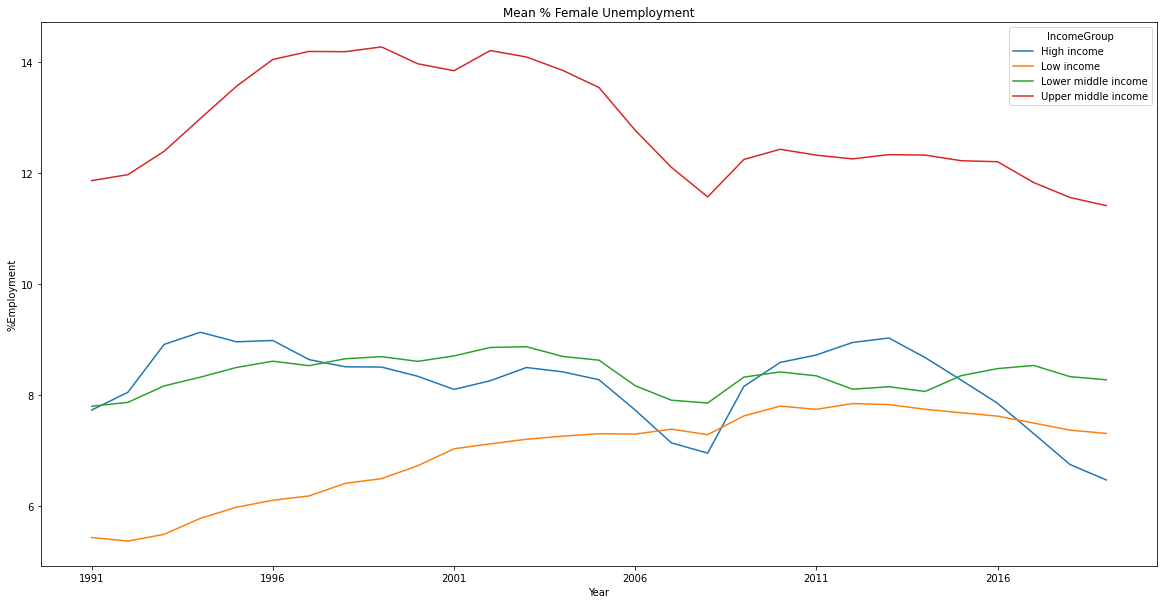

In [87]:
transposed_income_group.plot(figsize=(20,10))
plt.title("Mean % Female Unemployment")
plt.xlabel("Year")
plt.ylabel("%Employment")

In [83]:
grouped_data_region=merged_data_clean.groupby(['Region']).mean()
transposed_income_group2=grouped_data_region.transpose()

Text(0, 0.5, '%Employment')

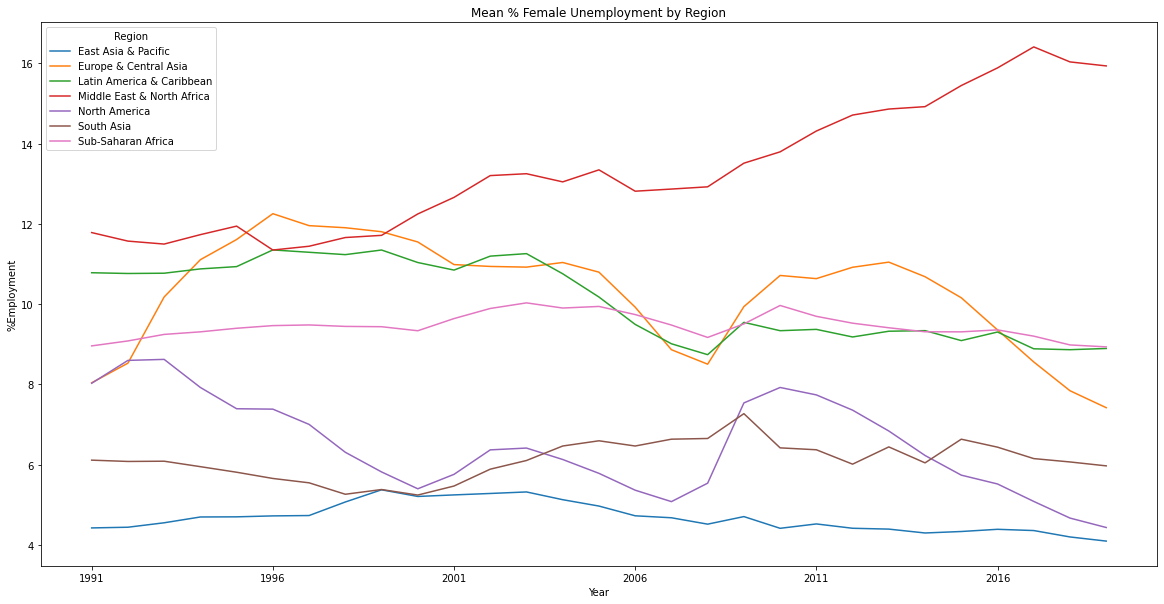

In [88]:
transposed_income_group2.plot(figsize=(20,10))
plt.title("Mean % Female Unemployment by Region")
plt.xlabel("Year")
plt.ylabel("%Employment")

## ANOVA

In [89]:
import scipy.stats as stats

In [90]:
merged_data_clean.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Region,IncomeGroup
1,Afghanistan,AFG,14.36,14.610000,14.610000,14.760000,14.950000,14.580000,14.760000,14.770000,14.840000,14.79,14.750000,15.02,14.870000,14.940000,14.96,14.540000,14.85,14.27,14.99,14.76,14.79,14.86,14.70,14.53,14.450000,14.33,14.09,13.92,13.81,South Asia,Low income
2,Angola,AGO,2.59,2.830000,2.900000,2.910000,2.940000,3.020000,2.910000,2.970000,2.920000,2.80,2.810000,2.94,2.840000,2.910000,2.92,2.810000,2.80,2.77,2.85,10.92,7.72,7.81,7.78,7.71,7.650000,7.50,7.41,7.28,7.22,Sub-Saharan Africa,Lower middle income
3,Albania,ALB,15.60,16.040001,16.639999,16.780001,16.790001,16.760000,16.410000,16.780001,16.950001,16.92,16.959999,16.99,17.010000,16.940001,16.85,16.620001,16.40,13.75,15.73,15.88,13.75,11.46,13.34,15.45,17.120001,14.45,12.48,11.87,11.31,Europe & Central Asia,Upper middle income
6,United Arab Emirates,ARE,2.35,2.110000,2.040000,2.200000,2.360000,2.340000,2.460000,2.540000,2.520000,2.72,3.400000,4.04,5.030000,6.090000,7.22,6.800000,7.04,6.71,6.53,5.77,5.96,5.72,5.27,4.62,4.450000,4.20,7.14,6.19,6.33,Middle East & North Africa,High income
7,Argentina,ARG,5.75,6.710000,12.560000,13.930000,22.190001,19.190001,17.629999,14.030000,15.150000,16.34,17.190001,18.83,17.549999,15.790000,13.56,12.390000,10.50,9.72,9.86,9.20,8.50,8.81,8.48,8.38,8.680000,9.14,9.46,10.54,10.70,Latin America & Caribbean,Upper middle income


In [94]:
income_groups=merged_data_clean['IncomeGroup'].unique()
income_groups

array(['Low income', 'Lower middle income', 'Upper middle income',
       'High income'], dtype=object)

In [97]:
income_group_data=[]
for i in range(len(income_groups)):
  income_group_data.append(merged_data_clean['2019'][merged_data_clean['IncomeGroup']==income_groups[i]])

In [106]:
statistic, pvalue=stats.f_oneway( income_group_data[0],income_group_data[1],
                                  income_group_data[2],income_group_data[3])
print("Statistic : %s pvalue %s" %(statistic,pvalue))


Statistic : 4.870325676502246 pvalue 0.002778561805787488


In [108]:
regions=merged_data_clean['Region'].unique()
print(regions)

regions_data=[]
for i in range(len(regions)):
  regions_data.append(merged_data_clean['2019'][merged_data_clean['Region']==regions[i]])

statistic,pvalue=stats.f_oneway(regions_data[0],regions_data[1],
                                regions_data[2],regions_data[3],
                                regions_data[4],regions_data[5],
                                regions_data[6])
print("Statistics: %s p value %s" %(statistic,pvalue))

if pvalue <0.05:
  print("Significant")
else:
   print("Not Significant") 

['South Asia' 'Sub-Saharan Africa' 'Europe & Central Asia'
 'Middle East & North Africa' 'Latin America & Caribbean'
 'East Asia & Pacific' 'North America']
Statistics: 7.284024705424667 p value 5.579592769807387e-07
Significant


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


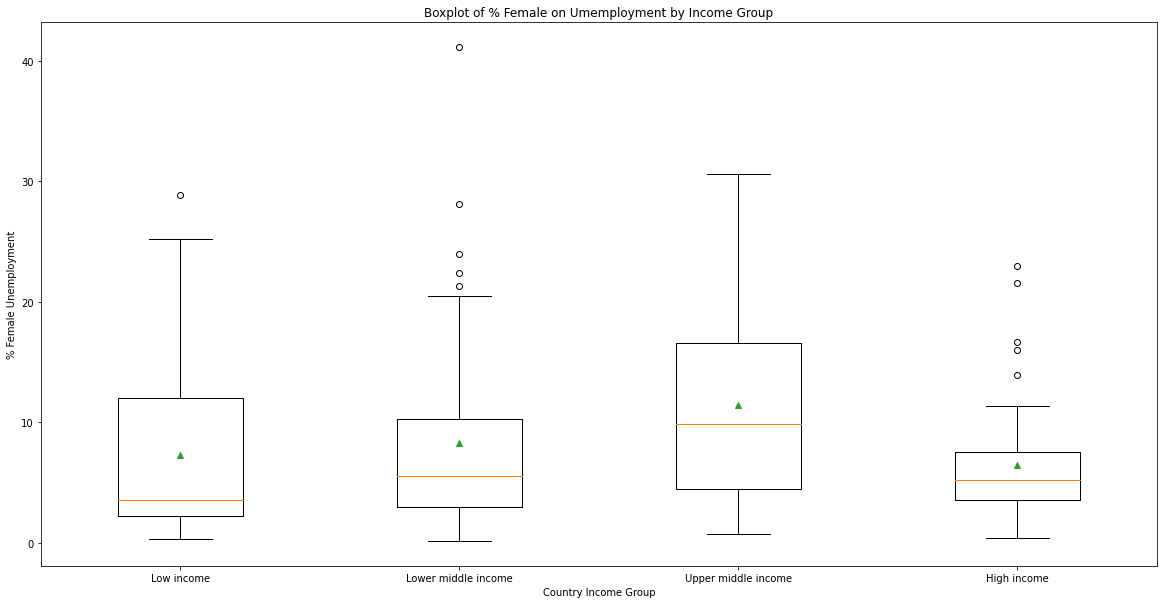

In [111]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111)
ax.set_title("Boxplot of % Female on Umemployment by Income Group")
ax.set
ax.boxplot(income_group_data,labels=income_groups,showmeans=True)

plt.xlabel("Country Income Group")
plt.ylabel("% Female Unemployment")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


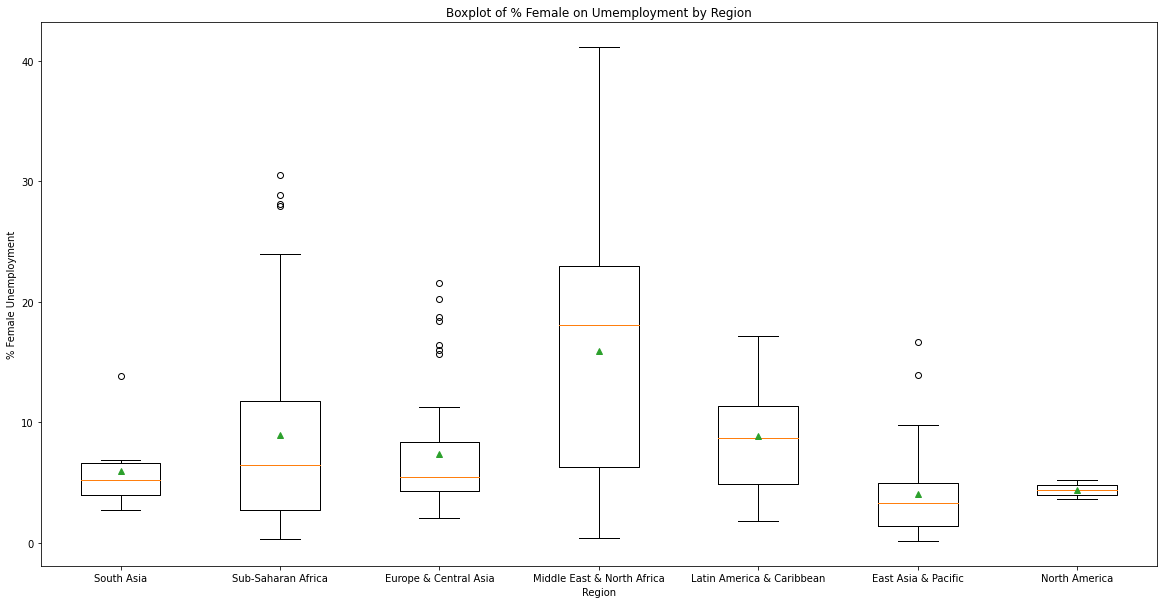

In [112]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111)

ax.set_title("Boxplot of % Female on Umemployment by Region")
ax.set

ax.boxplot(regions_data,labels=regions,showmeans=True)

plt.xlabel("Region")
plt.ylabel("% Female Unemployment")
plt.show()